# D206 P.A. : Full version

<a href="https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=fabe6906-423f-48f8-8f98-aceb0070942b" target="_blank"> Link to the Panopto Video </a>

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=fabe6906-423f-48f8-8f98-aceb0070942b

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Part I: Research Question:

###### A.  Describe one question or decision that you will address using the data set you chose. The summarized question or decision must be relevant to a realistic organizational need or situation.

“Given that it costs 10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. 
For many providers, retaining highly profitable customers is the number one business goal. To reduce customer churn, telecommunications companies need to predict which customers are at high risk of churn.” 
(D206 Data Cleaning_Churn Data Consideration and Dictionary.pdf)
In addition to prediction, the company may be interested in finding the main factors that may affect the churn possibility positively and negatively, therefore taking the right actions to deal with those factors.


##### B.  Describe the variables in the data set and indicate the specific type of data being described. Use examples from the data set that support your claims.

As Following:

## Importing Libraries

In [1]:
#imporing the needed libraries.
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) #modified Pandas options to fully display the large dataset when needed
## !!! Trying to Display a full Dataframe may cause a problem.
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Reading the CSV Data

In [2]:
#Reading the Data file (As received)
df_raw= pd.read_csv('churn_raw_data.csv')
df_raw.head(5) #Raw data values example

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


## Data info

In [3]:
df_raw.info() #Data Information of the Raw DataFrame (As received)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

###### 
The data (as received) contains 10000 rows/entries and 52 columns/variables, (as described in “ D206 Data Cleaning_Churn Data Consideration and Dictionary.pdf”) ,24 numerical variables (float64(9), int64(15)) And 28 string variables, Most of columns has full entries (10000) but some columns have null values.

In [4]:
#checking for empty Rows, 
df_raw.isnull().all(axis=1).any() #No empty rows. 

False

Null values - visual inspection

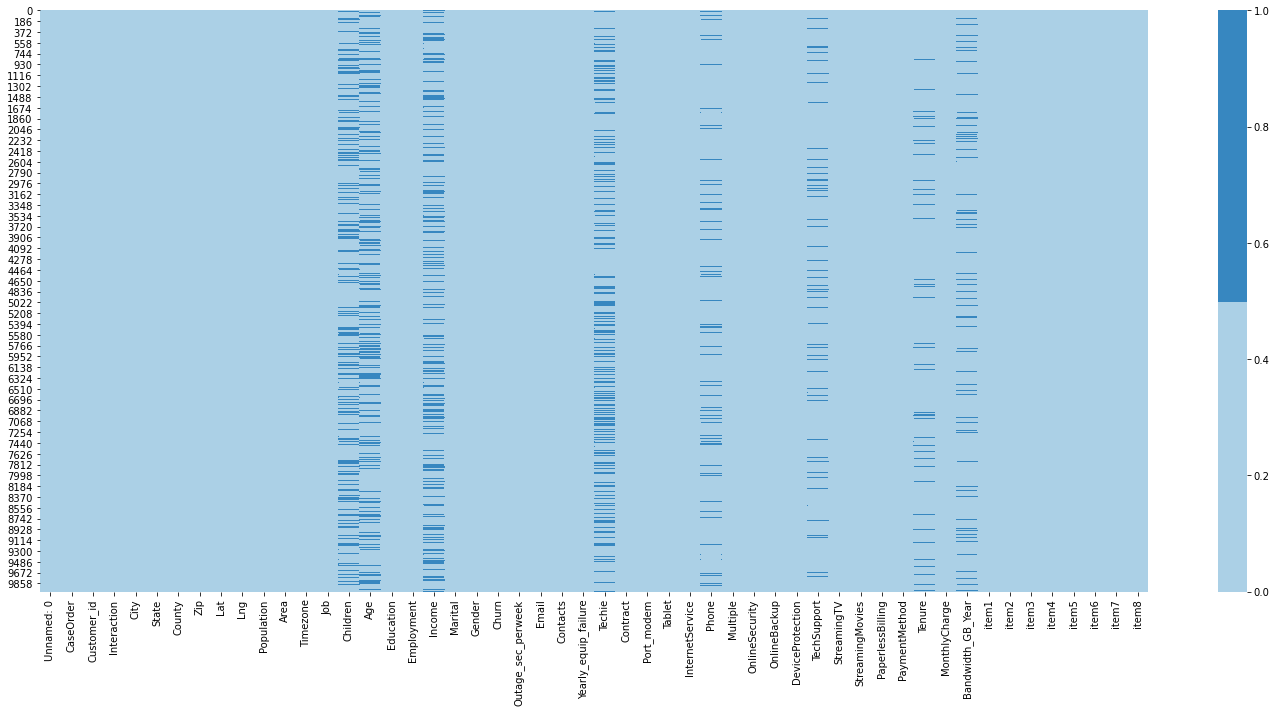

In [5]:
plt.figure(figsize=(20,10))
cmap1=sns.color_palette("Blues",2)
sns.heatmap(df_raw.isnull(),cmap=cmap1)
plt.tight_layout()
plt.show()

## Inspection for duplicates:

In [6]:
df_raw.duplicated().any()  #No fully duplicated rows 

False

## Summary statistics

In [7]:
#Summary statistics of Numerical variables of the Raw DataFrame
df_raw.describe().T  #Transposed to show large number of variables displayed as rows

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10000.0,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.00000
CaseOrder,10000.0,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.00000
Zip,10000.0,49153.319600,27532.196108,601.000000,26292.500000,48869.500000,71866.500000,99929.00000
Lat,10000.0,38.757567,5.437389,17.966120,35.341828,39.395800,42.106908,70.64066
Lng,10000.0,-90.782536,15.156142,-171.688150,-97.082813,-87.918800,-80.088745,-65.66785
Population,10000.0,9756.562400,14432.698671,0.000000,738.000000,2910.500000,13168.000000,111850.00000
Children,7505.0,2.095936,2.154758,0.000000,0.000000,1.000000,3.000000,10.00000
Age,7525.0,53.275748,20.753928,18.000000,35.000000,53.000000,71.000000,89.00000
Income,7510.0,39936.762226,28358.469482,740.660000,19285.522500,33186.785000,53472.395000,258900.70000
Outage_sec_perweek,10000.0,11.452955,7.025921,-1.348571,8.054362,10.202896,12.487644,47.04928


#### 
The following function is to be defined to visually identify many statistical parameters and get the sense from the Data, such as identify the outliers , ranges, dominant values,.etc


## Function
#### plt_summary() function to inspect the data visually usind Histogram, Boxplot and scattered plots

In [8]:
#Custom function to inspect the data visually usind Histogram, Boxplot and scattered plots
# this function takes 2 parameters, 1st is DataFrame , 2nd is the preferable plot ("hist" or "box" or " scat")
#will be used repeatedly through this excersise for data inspection.

def plt_summary(df_1,plt_type):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df = df_1.select_dtypes(include=numerics).copy()   # selecting only the numeric columns as it's suitable for mentioned plots
    print("Number of Numeric columns:  "+str(df.shape[1])) #Printing the number of numeric columns.
    plt.style.use('default')
    plt.figure(figsize=(10,20))
    plt_rows = 11
    plt_cols = 5
    pltlist=df.columns
    for n, col in enumerate(pltlist):   #enumerating each column of the data, starting from index
        b=n+1
        ax=plt.subplot2grid(shape=(plt_rows,plt_cols),loc=((int(np.ceil(b/plt_cols)-1)),((b-1)%plt_cols)))
        if plt_type == 'hist':
            ax.hist(df.loc[:,col],bins = 50)  #plotting Histogram
            ax.set_title(col)
        elif plt_type == 'box':
            msk = ~np.isnan(df.loc[:,col])
            ax.boxplot(df.loc[msk,col])  #plotting Box plot (used a mask to filter the null values)
            #ax.boxplot(df.loc[:,col])
            ax.set_title(col)
        elif plt_type == 'scat':
            ax.scatter(df.iloc[:,0],df.loc[:,col],s=0.1,alpha=0.1) #plotting scatterd plot against the 1st column of the D.F.
            ax.set_title(col) 
            
    plt.tight_layout()
    plt.show() 
   
    return 

## Visual Summary statistics (histograms)

Number of Numeric columns:  24


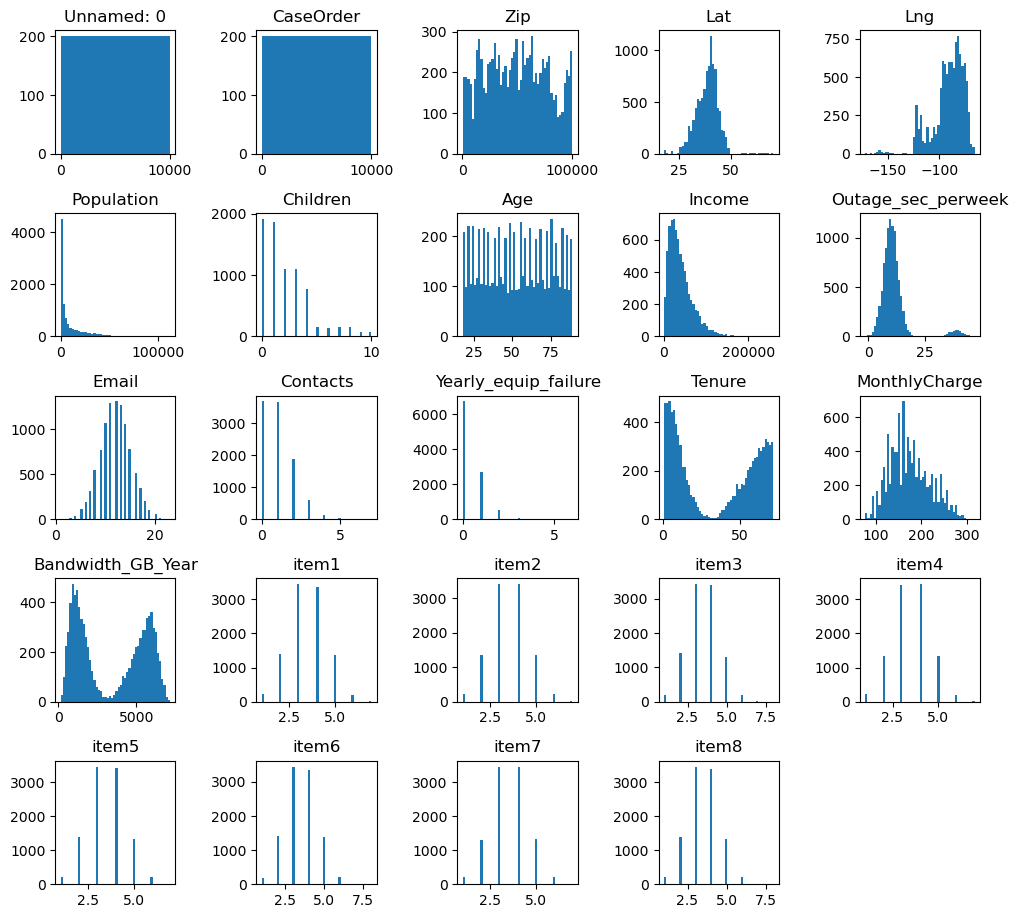

In [9]:
#calling the plt_summary to the Raw DataFrame
plt_summary(df_raw,"hist")

## Visual Summary statistics (Boxplots)

Number of Numeric columns:  24


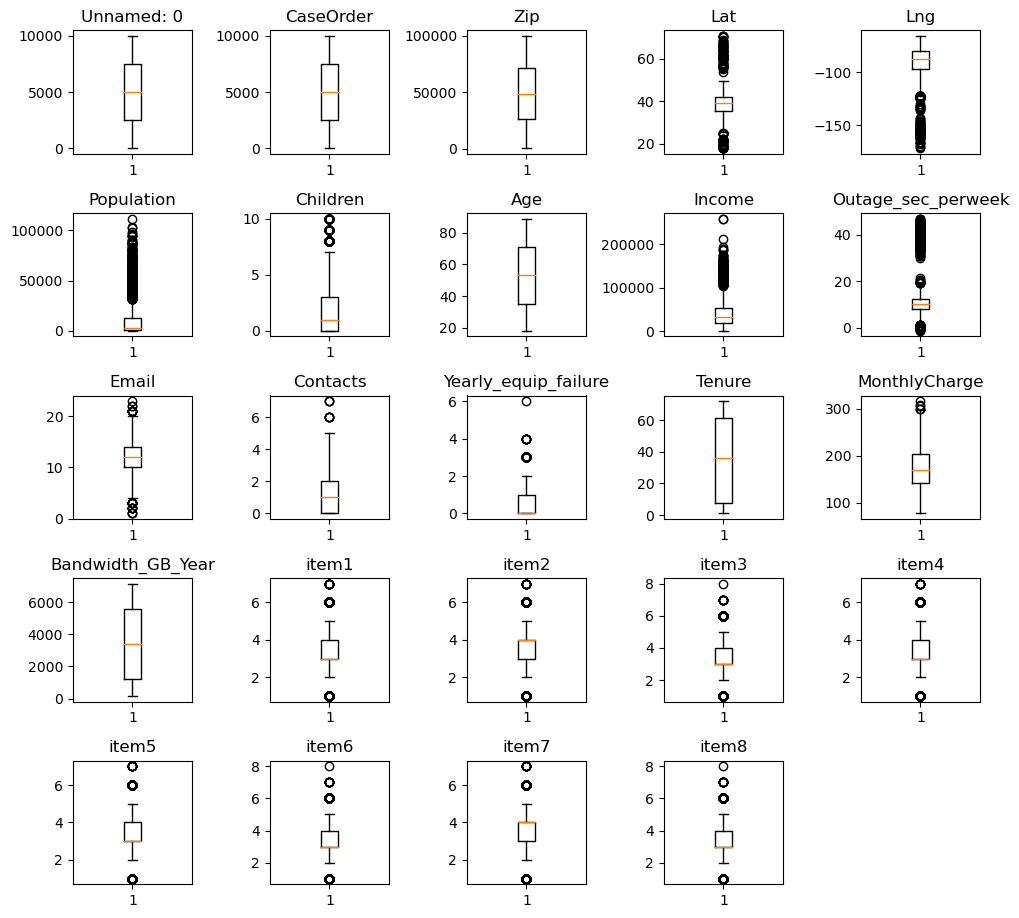

In [10]:
#calling the plt_summary to the Raw DataFrame
plt_summary(df_raw,"box")

## Visual Summary statistics (scattered plots)

Number of Numeric columns:  24


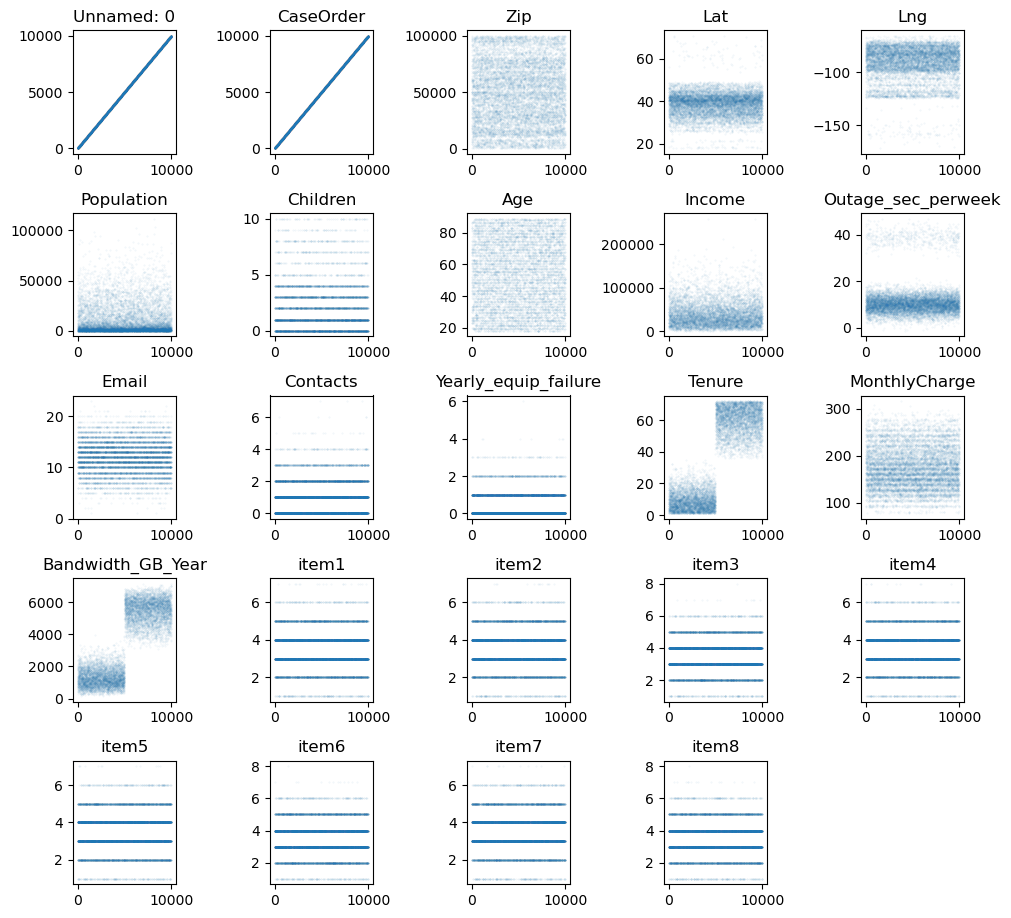

In [11]:
#calling the plt_summary to the Raw DataFrame
plt_summary(df_raw,"scat")

##### 
Now I can visually identify many statistical parameters and get the sense from the Data.
* notice that we could only plot the numeric variables .
* some variables are categorical but very likely to be converted into integers (Binary categorical) ,ex: (Yes/No , Female/Male) 

## Editing Copy

In [12]:
#Created a copy of Data to clean and edit
df_ed=df_raw.copy()

## Converting Binary categories into numeric

In [13]:
#Binary values replacement (Yes/No)
df_ed=df_ed.replace({'Yes':1,'No':0})

#Binary values replacement (Female/Male) 
df_ed=df_ed.replace({'Female':1,'Male':2})
#Additional category to binary Gender (Female/Male) appeared only 231 times.
df_ed['Gender']=df_ed['Gender'].replace('Prefer not to answer',3)

##### 
Now I can re-run the summary statistics and the visual statistical plots as we have converted some string categorical variables into numeric variables .
I will use df_ed Data frame from now on.
We can notice the newly converted (categorical) data , can be seen in statistical summaries and plots.

In [14]:
df_ed.info() #Data Information of the editing DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

In [15]:
#Summary statistics of Numerical variables of the editing DataFrame
df_ed.describe().T  #Transposed to show large number of variables displayed as rows

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10000.0,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.00000
CaseOrder,10000.0,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.00000
Zip,10000.0,49153.319600,27532.196108,601.000000,26292.500000,48869.500000,71866.500000,99929.00000
Lat,10000.0,38.757567,5.437389,17.966120,35.341828,39.395800,42.106908,70.64066
Lng,10000.0,-90.782536,15.156142,-171.688150,-97.082813,-87.918800,-80.088745,-65.66785
Population,10000.0,9756.562400,14432.698671,0.000000,738.000000,2910.500000,13168.000000,111850.00000
Children,7505.0,2.095936,2.154758,0.000000,0.000000,1.000000,3.000000,10.00000
Age,7525.0,53.275748,20.753928,18.000000,35.000000,53.000000,71.000000,89.00000
Income,7510.0,39936.762226,28358.469482,740.660000,19285.522500,33186.785000,53472.395000,258900.70000
Gender,10000.0,1.520600,0.543880,1.000000,1.000000,1.000000,2.000000,3.00000


Number of Numeric columns:  38


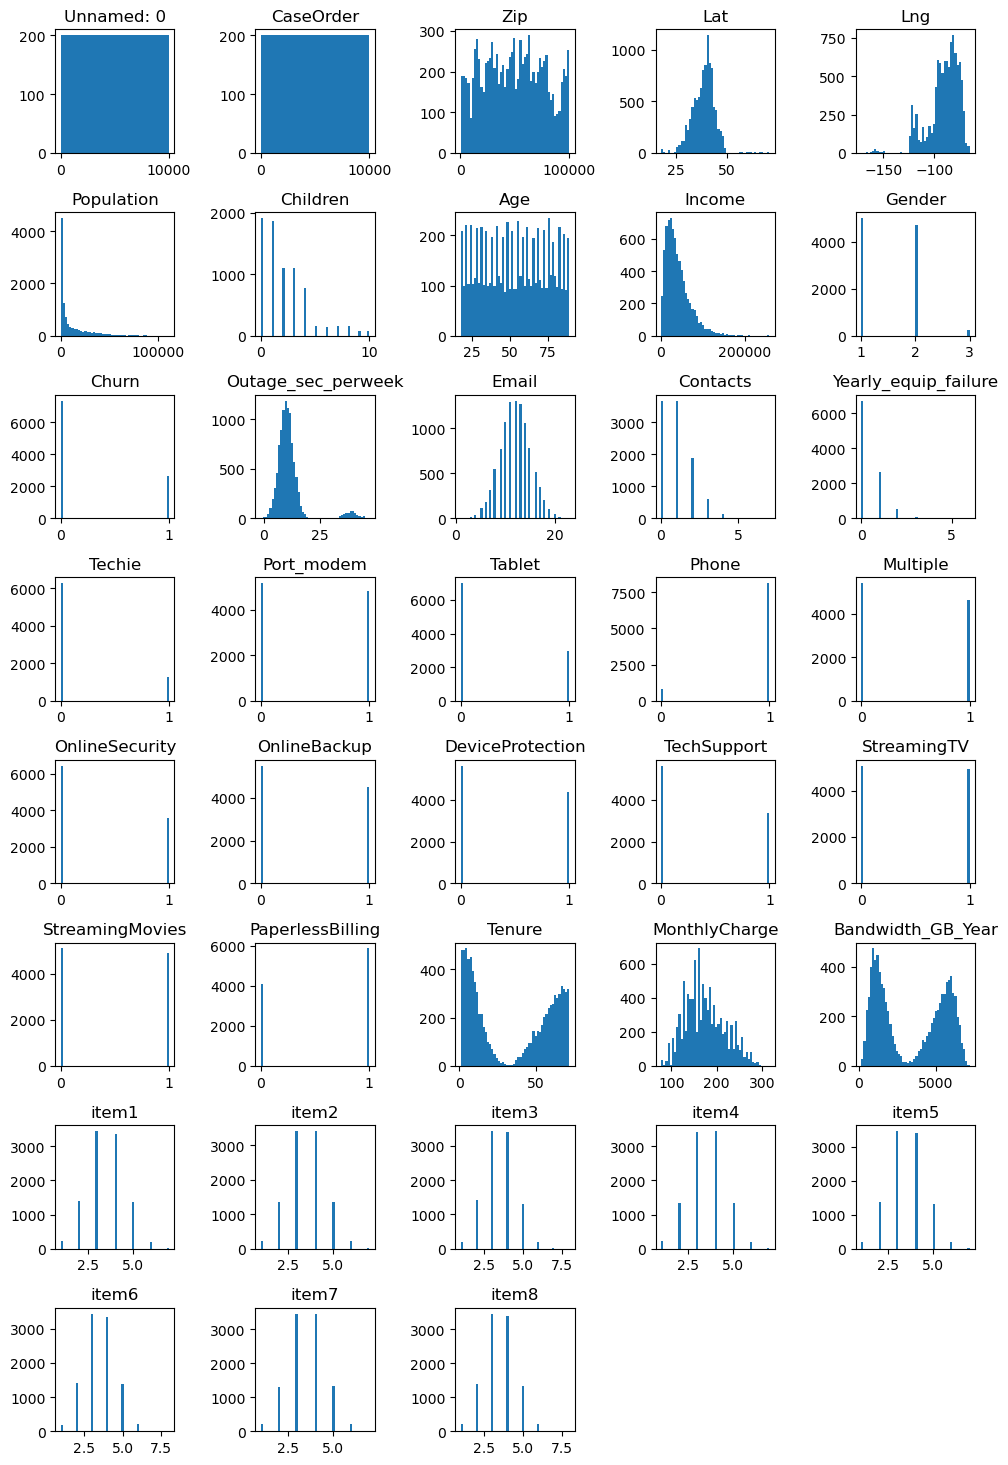

In [16]:
#calling the plt_summary to the editing DataFrame
plt_summary(df_ed,"hist")

Number of Numeric columns:  38


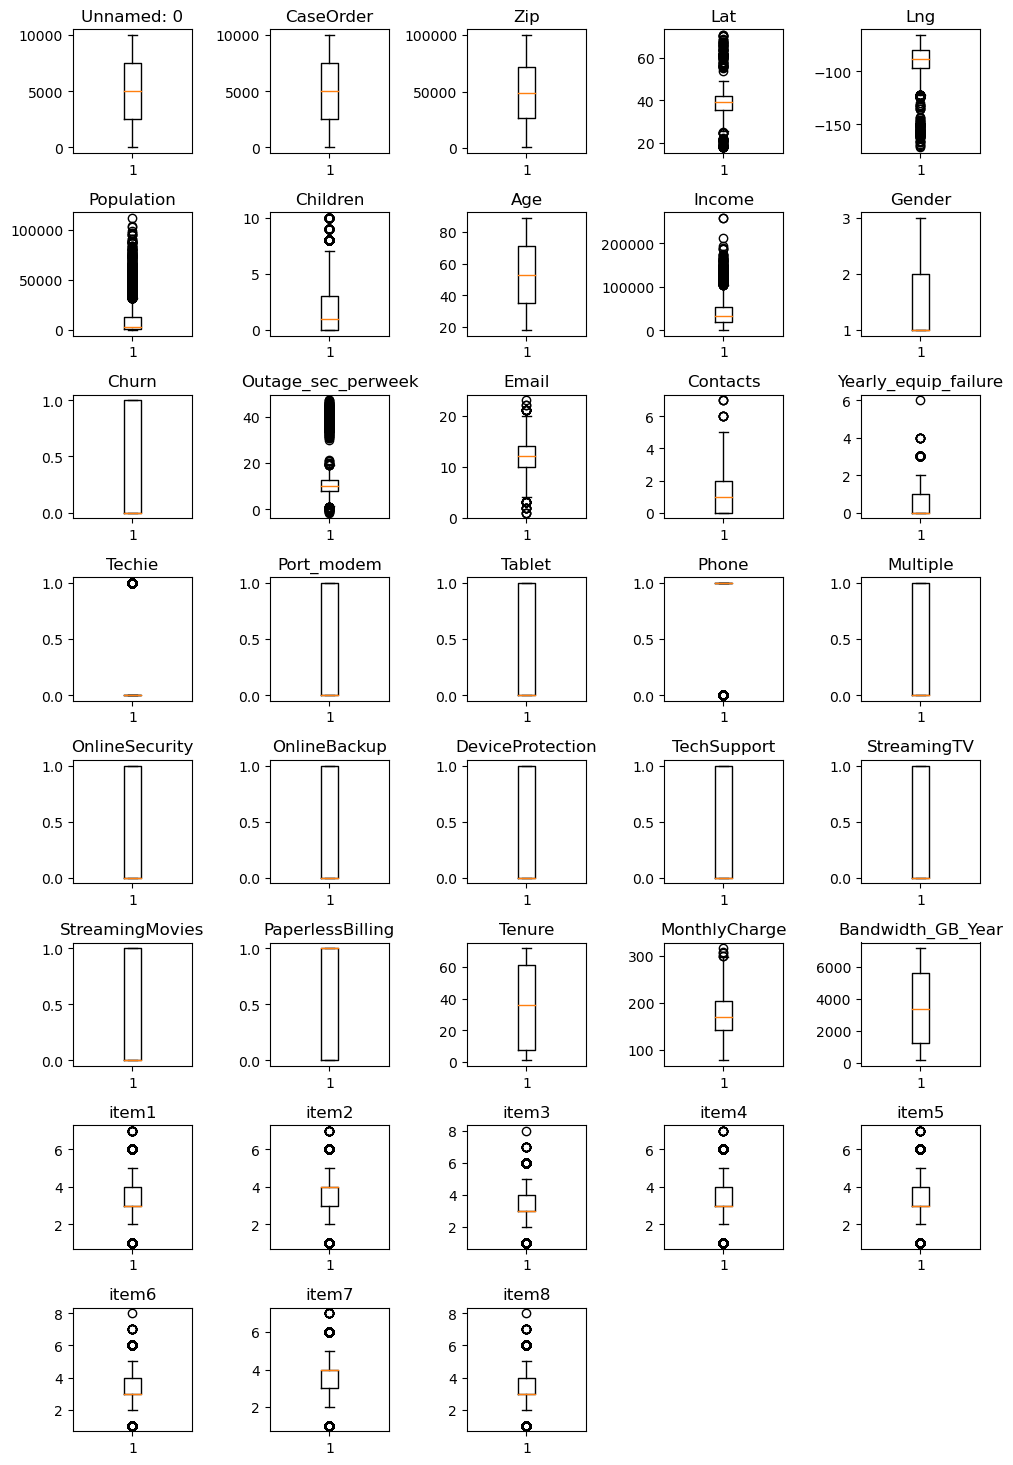

In [17]:
#calling the plt_summary to the editing DataFrame
plt_summary(df_ed,"box")

Number of Numeric columns:  38


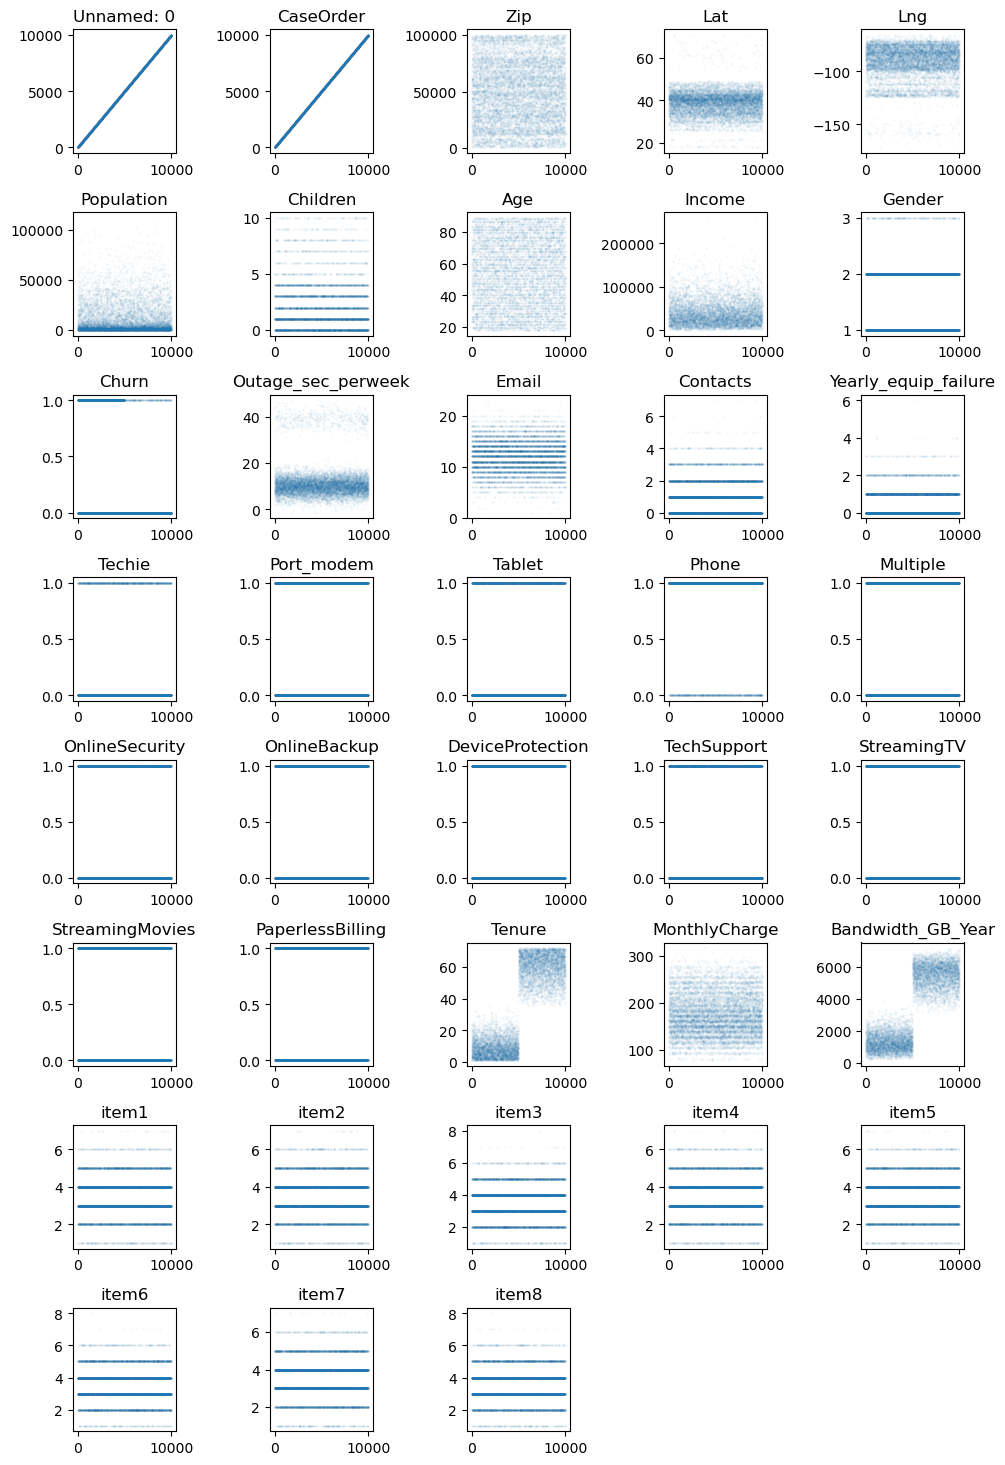

In [18]:
#calling the plt_summary to the editing DataFrame
plt_summary(df_ed,"scat")

###### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Part II: Data-Cleaning Plan

### Data Cleaning Plan:
1. Finding duplicated values.  (Done)
2. Converting the binary variables (the variables that contains yes/no values) into numeric form (ex: 1/0) in order to use them in further analysis. (Done)
3. Identifying and removing unwanted data outliers 
4. Identifying null values, and planning the proper method to deal with them by replacing (finding the proper replacement, either a default value or variable's mean value or a random range ,etc)

#### C.  Explain the plan for cleaning the data by doing the following:
##### 1.  Propose a plan that includes the relevant techniques and specific steps needed to identify anomalies in the data set.

#### Data Cleaning Plan:
1. Finding duplicated values.  (Done)
2. Converting the binary variables (the variables that contains yes/no values) into numeric form (ex: 1/0) in order to use them in further analysis. (Done)
3. Identifying and removing unwanted data outliers 
4. Identifying null values, and planning the proper method to deal with them by replacing (finding the proper replacement, either a default value or variable's mean value or a random range ,etc)

##### 2.  Justify your approach for assessing the quality of the data, include:
###### * characteristics of the data being assessed,



The data contains different typs (numeric, categorical , string, (yes/no) ) , some anomalies could be recognized from summary statistics and plots.
Some variables have large number of missing records (Null values).

###### * the approach used to assess the quality.

As eplained earlier , the data was examied statistically and visually in order to identify their types, ranges, anomalies,patterns , missing values..etc.

##### 3. Justify your selected programming language and any libraries and packages that will support the data-cleaning process.

Selected Python, the general-purpose language frequently used to complete data cleaning tasks, for more control on steps and details .
Selected Python libraries such as:

* Pandas : for data manipulation and analysis.
* numpy : for mathematical operations.
* Matplotlib: for visualization
* scikit-learn : for Principal Component Analysis


##### 4. Provide the code you will use to identify the anomalies in the data.

The code is included in this jupyter notebook

###### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Part III- Data Cleaning:

##### D.  Summarize the data-cleaning process by doing the following:

##### 1.  Describe the findings, including all anomalies, from the implementation of the data-cleaning plan from part C.

* No duplicated values found.
* Some outliers have been identified as shown from the summary statistics and statistical plots.  
* After examination of each variable separately , the examination was statistically and visually through plots. a detailed explaination is included in the sections "Identifying and Removing the Outliers" and "Missing values imputation".

##### 2.  Justify your methods for mitigating each type of discovered anomaly in the data set.

I have used relevant approaches , after examination of each variable separately , the examination was statistically and visually through plots.
the methods used to for for mitigating anomalies had to honor the statistical moments and distibution of each variabe, a detailed explaination is included in the section of "Missing values imputation".

##### 3.  Summarize the outcome from the implementation of each data-cleaning step.

Discussed in details in the section of "Missing values imputation"

##### 4.  Provide the code used to mitigate anomalies.

The code is included in this jupyter notebook , section of "Identifying and Removing the Outliers"

##### 5.  Provide a copy of the cleaned data set.

The code is included in this jupyter notebook and the copy of cleaned data will be submitted. 

##### 6.  Summarize the limitations of the data-cleaning process.

The data-cleaning process included removing anomalies which is a subjective process and a matter of understanding , then replacing those anomalies with suggested values whic is also matter of understanding the data.
this subjective approach , eventhough it was carefully done and examined ,may imply a considerable ammount of bias.
we can notice this with the processing done to some coulms such as "Income" , the has been skewed and condensed towards average. 
after applying the PCA in the last section I have applied some experiments on the data in order to check the effect of cleaning decesions and options on the analysis and the purpose of the study (identifying factors that may control customers churn probability) , these options included:
* Using numeric fields only Vs including binary categorical fields
* Removing outliers.
* Removing irrelevant variables from the PCA , Indices ('Unnamed: 0', 'CaseOrder’)  and location ('Zip','Lng','Lat’)
* Removing the variables inhomogeneous variables 'Bandwidth_GB_Year' and 'Tenure'

The details of this experemnt is included in this notebook , but in summary the conclusion regarding the question is :
* Removing outliers didn’t make clear difference.
* Using only the original numerical fields is better than converting categorical fields into num.

the rest of experement conclusions will be explained after the PCA section.

##### 7.  Discuss how the limitations in part D6 affect the analysis of the question or decision from part A.

As discussed and explained in question D6 , the effect of limitations of data-cleaning process has been examined and can be neglected for the purpose of the current study.

## Selecting only numeric fields

In [19]:
#Created a copy of Numeric fields only
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df_ed.select_dtypes(include=numerics).copy()

## Identifying and Removing the Outliers

From both of summary statistics and boxplot displayed , we can see that some outlirs excist and possibly may affect the analysis (will be discussed later) , for example : the column 'Outage_sec_perweek' contains some negative values (negative seconds), and some columns (such as 'Income') have extreme values that extremely spread the variable range.
the next code block is showing how i have identified the anomalous values (oultiers) , depending on z-score of each point , limiting the acceptance range to 3 standard deviations from the avarage of each variable on both sides, except for "Income" variable , which had too extreme values in the High side.
at this stage , I just replaced those unwanted values with NaN using "where()" function.

In [20]:
df_otl = df_num.copy()

q1=df_otl.quantile(0.25)
q3=df_otl.quantile(0.75)
iqr=q3-q1
pmin=q1-iqr*1.5
pmax=q3+iqr*1.5
otl_cols = ['Population','Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
            'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']
for n,col in enumerate(otl_cols):
    if col == 'Income':
        df_otl.loc[:,col]=df_otl.loc[:,col].where(df_otl.loc[:,col].between(q1[col]-iqr[col]*1.5,q3[col]+iqr[col]*1.2))   
    else:
        df_otl.loc[:,col]=df_otl.loc[:,col].where(df_otl.loc[:,col].between(pmin[col],pmax[col]))
df_num = df_otl.copy()

## Missing values imputation

From the initial analysis , we can see some column with missing values 

'Children'              7505 non-null   float64

'Age'                   7525 non-null   float64

'Income'                7510 non-null   float64

'Techie'                7523 non-null   object 

'Phone'                 8974 non-null   object 

'TechSupport'           9009 non-null   object 

'Tenure'                9069 non-null   float64

'Bandwidth_GB_Year'     8979 non-null   float64
 
, Here I am trying to replace these missing values with reasonable replacements 

##### 
the 'Phone' column has 8974 not null values (1026 missing) , most of values are 1 (or 'Yes') (8128 values), replacing missing values with '1' is reasonable because probably most of missing values would be '1'
* notice the histogram and the box plot

In [21]:
df_num['Phone'].describe()

count    8974.000000
mean        0.905728
std         0.292224
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Phone, dtype: float64

In [22]:
#1 is a reasonable NaN replacement in this case,because it's the mode by large difference
df_num['Phone']=df_num['Phone'].fillna(1)
df_num['Phone']=df_num['Phone'].astype('int')
df_num['Phone'].describe()

count    10000.000000
mean         0.915400
std          0.278299
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Phone, dtype: float64

##### 
the 'Techie' column has 7523 not null values (2477 missing) , most of values are 0 (or 'No') (6266 values), replacing missing values with '0' is reasonable because probably most of missing values would be '0'
* notice the histogram and the box plot

In [23]:
df_num['Techie'].describe()

count    7523.000000
mean        0.167088
std         0.373079
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Techie, dtype: float64

In [24]:
#0 is a reasonable NaN replacement in this case,because it's the mode by large difference
df_num['Techie']=df_num['Techie'].fillna(0)
df_num['Techie']=df_num['Techie'].astype('int')
df_num['Techie'].describe()

count    10000.000000
mean         0.125700
std          0.331528
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Techie, dtype: float64

##### 
the 'Age' column is a little bit more challenging , it has 7525 not null values (2475 missing) , the histogram shows almost flat distribution of customers ages , the scattered and the box plots cofirms this note.
probably the best missing data replacement in this case would be a random value between the maximum age 89 years and the minimum 18 years. 
* notice the histogram and the box plot

In [25]:
df_num['Age'].describe()

count    7525.000000
mean       53.275748
std        20.753928
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64

In [26]:
df_tst=df_num.copy() #A dummy variable until the results can be invistigated
for i,c in enumerate(df_tst['Age']):
    if pd.isnull(df_tst.at[i,'Age']):
        df_tst.loc[i,'Age']=np.random.randint(18,89)
df_tst['Age'].describe()

count    10000.000000
mean        53.267000
std         20.700878
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

#### 
In order to "quality control" the Data imputation , I have defined a useful custome function that makes it easy to compare the variable before and after values replacement

## Function
#### chk_imput() function to compare visually the replaced columns in 2 DataFrames

In [27]:
#Custom function to compare visually the replaced columns in 2 DataFrames , before and after using the summary
#statistics and hitograms, Box and scattered plots
# this function takes 3 parameters, 1st is DataFrame before replacement , 2nd DataFrame after replacement (typically a dummy df)
# 3d is the variable subject to replacement or imputation.
#will be used repeatedly through this excersise for data cleaning and editing comparisons.

def chk_imput(before,after,column):
    print("Check Imputation Function :   ")
    print("Before/After imputation Comparison of variable : ["+str(before[column].name)+"]")
    com_df= pd.DataFrame({'before':before[column],'after':after[column]})
    print(com_df.describe())
    plt.style.use('default')
    plt.figure(figsize=(10,10))
    plt_rows = 4
    plt_cols = 4
    pltlist=com_df.columns
    for n, col in enumerate(pltlist):
        ax1=plt.subplot2grid(shape=(plt_rows,plt_cols),loc=(n,1))  #plots declaration
        ax2=plt.subplot2grid(shape=(plt_rows,plt_cols),loc=(n,2))
        ax3=plt.subplot2grid(shape=(plt_rows,plt_cols),loc=(n,3))
        ax1.hist(com_df.loc[:,col],bins = 100)
        ax1.set_title(column+' '+col) #histogram
        msk = ~np.isnan(com_df.loc[:,col])
        ax2.boxplot(com_df.loc[msk,col]) #boxplot
        ax2.set_title(column+' '+col)
        ax3.scatter(before.iloc[:,0],com_df.loc[:,col],s=0.1,alpha=0.1) #scattered plot of the variable vs the index
        ax3.set_title(column+' '+col) 
    plt.tight_layout()
    plt.show() 
    return

Calling the chk_imput function to 'Age' variable , comparing df_raw and the dummy dataframe df_tst

Check Imputation Function :   
Before/After imputation Comparison of variable : [Age]
            before         after
count  7525.000000  10000.000000
mean     53.275748     53.267000
std      20.753928     20.700878
min      18.000000     18.000000
25%      35.000000     35.000000
50%      53.000000     53.000000
75%      71.000000     71.000000
max      89.000000     89.000000


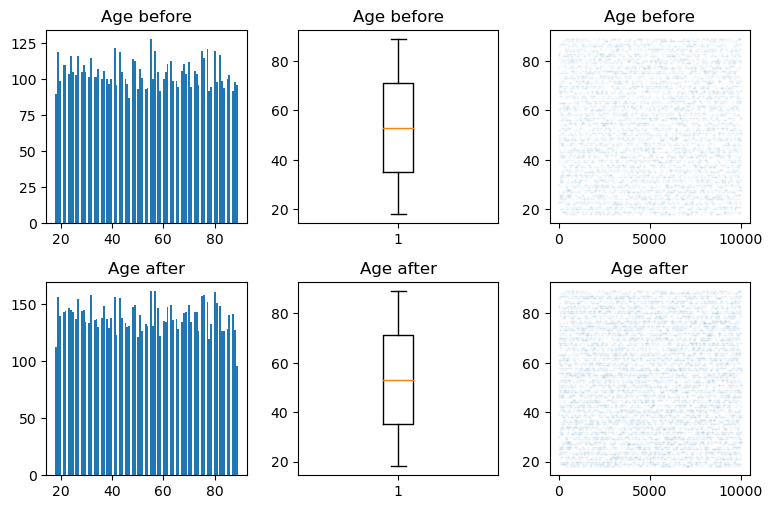

In [28]:
chk_imput(df_num,df_tst,'Age')

##### 
We can see clearly from the summary statistics and the plots , the Age distribution is very well mentained ,almost same ranges, mean, median values .
As I believe it was a succesful imputation I can reassign the 'Age' column to the editing dataframe.

In [29]:
df_num['Age']=df_tst['Age'].astype('int')
df_num['Age'].describe()

count    10000.000000
mean        53.267000
std         20.700878
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

##### 
the 'Children' column has 7505 not null values (2495 missing) , the distribution shown by histogram shows , scattered and the box plots cofirms the published demographic data, that 0 child is the most frequent number of children , number 1 also has a considerable number of occurenses, 
A random.choice function has been used to replace the missing values with either 0 or 1 randomly , giving more weight to number 0 choice.  
* notice the histogram and the box plot

In [30]:
df_num['Children'].describe()

count    7203.000000
mean        1.818131
std         1.700162
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         7.000000
Name: Children, dtype: float64

In [31]:
df_tst=df_num.copy() #A dummy variable until the results can be invistigated
for i,c in enumerate(df_tst['Children']):
    if pd.isnull(df_tst.at[i,'Children']):
        df_tst.loc[i,'Children']=np.random.choice([0,1])
df_tst['Children'].describe()

count    10000.00000
mean         1.44950
std          1.58174
min          0.00000
25%          0.00000
50%          1.00000
75%          2.00000
max          7.00000
Name: Children, dtype: float64

Calling the chk_imput function to 'Children' variable , comparing df_raw and the dummy dataframe df_tst

Check Imputation Function :   
Before/After imputation Comparison of variable : [Children]
            before        after
count  7203.000000  10000.00000
mean      1.818131      1.44950
std       1.700162      1.58174
min       0.000000      0.00000
25%       0.000000      0.00000
50%       1.000000      1.00000
75%       3.000000      2.00000
max       7.000000      7.00000


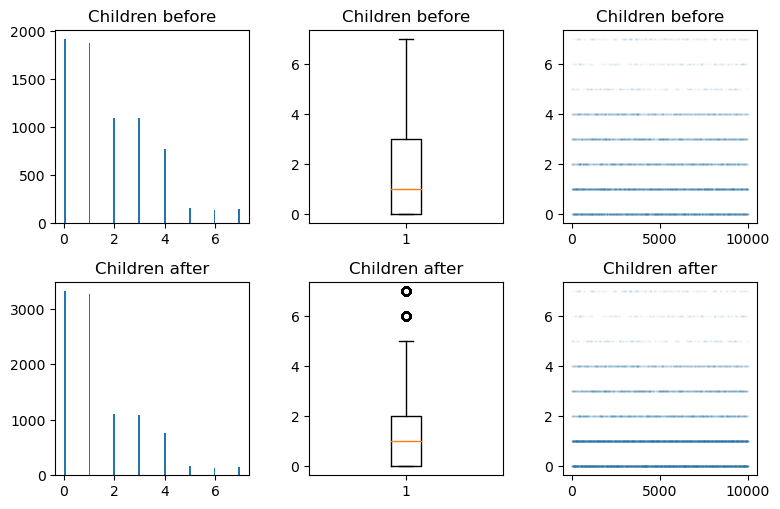

In [32]:
chk_imput(df_num,df_tst,'Children')

##### 
We can see clearly from the summary statistics and the plots , the number of Children distribution is very well mentained ,
As I believe it was a succesful imputation I can reassign the 'Children' column to the editing dataframe.

In [33]:
df_num['Children']=df_tst['Children'].astype('int')
df_num['Children'].describe()

count    10000.00000
mean         1.44950
std          1.58174
min          0.00000
25%          0.00000
50%          1.00000
75%          2.00000
max          7.00000
Name: Children, dtype: float64

##### 
the 'Tenure' column is another imputation challenge , eventhough it has 9069 not null values (931 missing) , 
the histogram shows a bi-modal distribution , the scattered and the box plots cofirms this note.where we can see obviously the data are clustered in two big separated clusters.a clear pattern can be noticed (in addition to bi-modality) , separating values before and after Row 5000 on the origional data index.
obviously choosing replacement by mean() or mode() or any constant would contaminate the data and would possibly cause bias in analysis.
probably the best missing data replacement in this case would be a random value between the maximum the minimum values of each cluster.
taking in consideration the separator at Row number 5000 
* notice the histogram and the box plot

In [34]:
df_num['Tenure'].describe()

count    9069.000000
mean       34.498858
std        26.438904
min         1.000259
25%         7.890442
50%        36.196030
75%        61.426670
max        71.999280
Name: Tenure, dtype: float64

In [35]:
df_tst=df_num.copy() #A dummy variable until the results can be invistigated
for i,c in enumerate(df_tst['Tenure']):
    if pd.isnull(df_tst.at[i,'Tenure']):
        if i <=5000:
            df_tst.loc[i,'Tenure']=np.random.randint(1,30)
        elif i > 5000:
            df_tst.loc[i,'Tenure']=np.random.randint(50,71)
df_tst['Tenure'].describe()

count    10000.000000
mean        34.780014
std         26.206243
min          1.000000
25%          8.276748
50%         35.430507
75%         61.282180
max         71.999280
Name: Tenure, dtype: float64

Calling the chk_imput function to 'Tenure' variable , comparing df_raw and the dummy dataframe df_tst

Check Imputation Function :   
Before/After imputation Comparison of variable : [Tenure]
            before         after
count  9069.000000  10000.000000
mean     34.498858     34.780014
std      26.438904     26.206243
min       1.000259      1.000000
25%       7.890442      8.276748
50%      36.196030     35.430507
75%      61.426670     61.282180
max      71.999280     71.999280


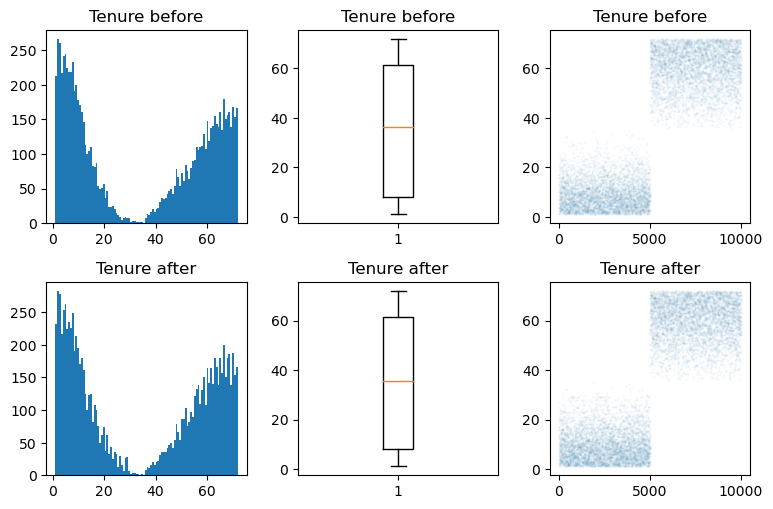

In [36]:
chk_imput(df_num,df_tst,'Tenure')

##### 
We can see  from the summary statistics and the plots , the variable distribution is hardly mentained ,
but the overall reseult is acceptable.

In [37]:
df_num['Tenure']=df_tst['Tenure'].astype('int')
df_num['Tenure'].describe()

count    10000.000000
mean        34.326900
std         26.211348
min          1.000000
25%          8.000000
50%         35.000000
75%         61.000000
max         71.000000
Name: Tenure, dtype: float64

##### 
the 'Bandwidth_GB_Year' is very similar to the 'Tenure' column ,with 8979 not null values (1021 missing) , 
the histogram shows a bi-modal distribution , the scattered and the box plots cofirms this note.where we can see obviously the data are clustered in two big separated clusters.
a clear pattern can be noticed (in addition to bi-modality) , separating values before and after Row 5000 on the origional data index.
obviously choosing replacement by mean() or mode() or any constant would contaminate the data and would possibly cause bias in analysis.
probably the best missing data replacement in this case would be a random value between the maximum the minimum values of each cluster.
taking in consideration the separator at Row number 5000 
* notice the histogram and the box plot

In [38]:
df_num['Bandwidth_GB_Year'].describe()

count    8979.000000
mean     3398.842752
std      2187.396807
min       155.506715
25%      1234.110529
50%      3382.424000
75%      5587.096500
max      7158.982000
Name: Bandwidth_GB_Year, dtype: float64

In [39]:
df_tst=df_num.copy() #A dummy variable until the results can be invistigated
for i,c in enumerate(df_tst['Bandwidth_GB_Year']):
    if pd.isnull(df_tst.at[i,'Bandwidth_GB_Year']):
        if i <=5000:
            df_tst.loc[i,'Bandwidth_GB_Year']=np.random.randint(155,3000)
        if i > 5000:
            df_tst.loc[i,'Bandwidth_GB_Year']=np.random.randint(4000,7158)
df_tst['Bandwidth_GB_Year'].describe()

count    10000.000000
mean      3410.382207
std       2184.295942
min        155.506715
25%       1251.370961
50%       3287.404879
75%       5579.621000
max       7158.982000
Name: Bandwidth_GB_Year, dtype: float64

Calling the chk_imput function to 'Bandwidth_GB_Year' variable , comparing df_raw and the dummy dataframe df_tst

Check Imputation Function :   
Before/After imputation Comparison of variable : [Bandwidth_GB_Year]
            before         after
count  8979.000000  10000.000000
mean   3398.842752   3410.382207
std    2187.396807   2184.295942
min     155.506715    155.506715
25%    1234.110529   1251.370961
50%    3382.424000   3287.404879
75%    5587.096500   5579.621000
max    7158.982000   7158.982000


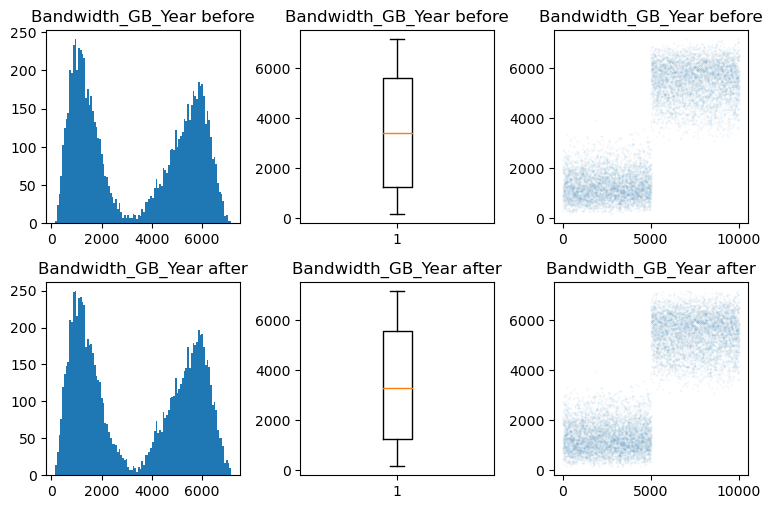

In [40]:
chk_imput(df_num,df_tst,'Bandwidth_GB_Year')

In [41]:
df_num['Bandwidth_GB_Year']=df_tst['Bandwidth_GB_Year'].astype('int')
df_num['Bandwidth_GB_Year'].describe()

count    10000.000000
mean      3409.932600
std       2184.292264
min        155.000000
25%       1251.000000
50%       3287.000000
75%       5579.000000
max       7158.000000
Name: Bandwidth_GB_Year, dtype: float64


##### 
the 'TechSupport' column has 9009 not null values (991 missing) , almost 56% of values are 0 (or 'No') and the rest  are 1 or('Yes' ) , 
not so easy to decide the best replacement value
a random value has been used to fill the null values. (0 or 1)
* notice the histogram and the box plot

In [42]:
df_num['TechSupport'].describe()

count    9009.000000
mean        0.374514
std         0.484024
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: TechSupport, dtype: float64

In [43]:
df_tst=df_num.copy() #A dummy variable until the results can be invistigated , used the prviously convtd valued of df_ed
for i,c in enumerate(df_tst['TechSupport']):
    if pd.isnull(df_tst.at[i,'TechSupport']):
        df_tst.loc[i,'TechSupport']=np.random.choice([0,1])
df_tst['TechSupport'].describe()

count    10000.000000
mean         0.387800
std          0.487273
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: TechSupport, dtype: float64

Calling the chk_imput function to 'TechSupport' variable , comparing df_raw and the dummy dataframe df_tst

Check Imputation Function :   
Before/After imputation Comparison of variable : [TechSupport]
            before         after
count  9009.000000  10000.000000
mean      0.374514      0.387800
std       0.484024      0.487273
min       0.000000      0.000000
25%       0.000000      0.000000
50%       0.000000      0.000000
75%       1.000000      1.000000
max       1.000000      1.000000


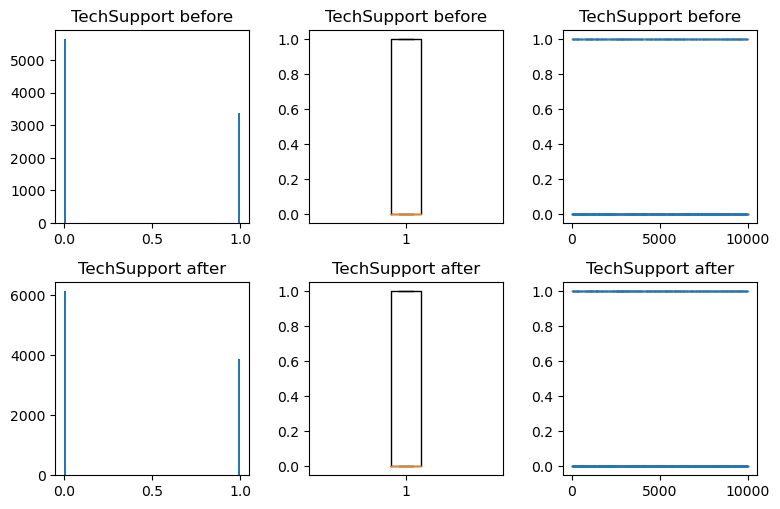

In [44]:
chk_imput(df_num,df_tst,'TechSupport')

In [45]:
df_num['TechSupport']=df_tst['TechSupport'].astype('int')
df_num['TechSupport'].describe()

count    10000.000000
mean         0.387800
std          0.487273
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: TechSupport, dtype: float64


##### 
the 'Income' column has 7510 not null values (2490 missing) , the challenge with this variable is that it is sevierly skewed , finding a reasonable replacement values for the missing is a difficult task, especially because this variable is probably at high importance regarding the organization need and the business question of this excercise.
A random value between the variable's q25 and q75 has been used.

* notice the histogram and the box plot

In [46]:
df_num['Income'].describe()

count     7118.000000
mean     35648.552645
std      21606.107771
min        740.660000
25%      18551.220000
50%      31651.200000
75%      49496.667500
max      94338.500000
Name: Income, dtype: float64

In [47]:
df_tst=df_num.copy() #A dummy variable until the results can be invistigated
for i,c in enumerate(df_tst['Income']):
    if pd.isnull(df_tst.at[i,'Income']):
        df_tst.loc[i,'Income']=np.random.randint(19285,53472) #df_raw['Income'].mode()[0]
df_tst['Income'].describe()

count    10000.000000
mean     35910.271573
std      18970.104950
min        740.660000
25%      22111.300000
50%      33684.680000
75%      47114.250000
max      94338.500000
Name: Income, dtype: float64

Calling the chk_imput function to 'Income' variable , comparing df_raw and the dummy dataframe df_tst

Check Imputation Function :   
Before/After imputation Comparison of variable : [Income]
             before         after
count   7118.000000  10000.000000
mean   35648.552645  35910.271573
std    21606.107771  18970.104950
min      740.660000    740.660000
25%    18551.220000  22111.300000
50%    31651.200000  33684.680000
75%    49496.667500  47114.250000
max    94338.500000  94338.500000


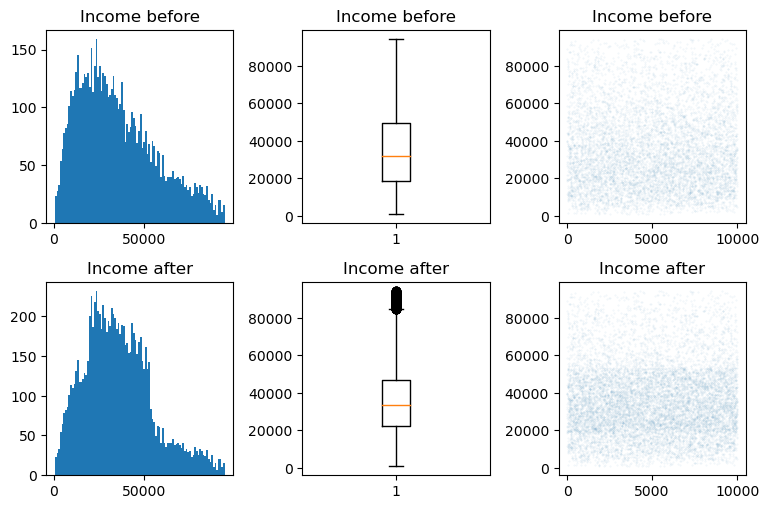

In [48]:
chk_imput(df_num,df_tst,'Income')

In [49]:
df_num['Income']=df_tst['Income']
df_num['Income'].describe()

count    10000.000000
mean     35910.271573
std      18970.104950
min        740.660000
25%      22111.300000
50%      33684.680000
75%      47114.250000
max      94338.500000
Name: Income, dtype: float64

#### 
Removing outliers has introduced NaN values in some columns that were full before, It's a side effect of removing outliers.

In [50]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Zip                   10000 non-null  int64  
 3   Lat                   10000 non-null  float64
 4   Lng                   10000 non-null  float64
 5   Population            9063 non-null   float64
 6   Children              10000 non-null  int32  
 7   Age                   10000 non-null  int32  
 8   Income                10000 non-null  float64
 9   Gender                10000 non-null  int64  
 10  Churn                 10000 non-null  int64  
 11  Outage_sec_perweek    9461 non-null   float64
 12  Email                 9962 non-null   float64
 13  Contacts              9992 non-null   float64
 14  Yearly_equip_failure  9906 non-null   float64
 15  Techie              

#### 
I have created a function , following the rules discussed earlier in this section , to fill null values for the rest of columns containing null values column according to specific criteria for each of them



## Function
#### fillna_all_cols() function , to Fill NaN values all at once

In [51]:
#cols = list of columns to be NaN filled all at once
def fillna_all_cols(df_x,cols):
    for idx,col in enumerate(cols):
        if col == 'Population':
            for i,c in enumerate(df_x['Population']):
                if pd.isnull(df_x.at[i,'Population']):
                    df_x.loc[i,'Population']=np.random.randint(738,7177)
            df_x['Population']=df_x['Population'].astype('int')
            
        if col == 'Outage_sec_perweek':
            for i,c in enumerate(df_x['Outage_sec_perweek']):
                if pd.isnull(df_x.at[i,'Outage_sec_perweek']):
                    df_x.loc[i,'Outage_sec_perweek']=np.random.randint(1,19)
            #df_x['Outage_sec_perweek']=df_x['Outage_sec_perweek'].astype('int')
            
        if col == 'Email':
            for i,c in enumerate(df_x['Email']):
                if pd.isnull(df_x.at[i,'Email']):
                    df_x.loc[i,'Email']=np.random.randint(5,19)
            df_x['Email']=df_x['Email'].astype('int')
            
        if col == 'Contacts':
            for i,c in enumerate(df_x['Contacts']):
                if pd.isnull(df_x.at[i,'Contacts']):
                    df_x.loc[i,'Contacts']=np.random.randint(0,2)
            df_x['Contacts']=df_x['Contacts'].astype('int')
            
        if col == 'Yearly_equip_failure':
            df_x['Yearly_equip_failure']=df_x['Yearly_equip_failure'].fillna(0)
            df_x['Yearly_equip_failure']=df_x['Yearly_equip_failure'].astype('int')
                        
        if col == 'MonthlyCharge':
            for i,c in enumerate(df_x['MonthlyCharge']):
                if pd.isnull(df_x.at[i,'MonthlyCharge']):
                    df_x.loc[i,'MonthlyCharge']=np.random.randint(77,203)
            df_x['MonthlyCharge']=df_x['MonthlyCharge'].astype('int')
            
        if col == 'Phone':
            df_x['Phone']=df_x['Phone'].fillna(1)
            df_x['Phone']=df_x['Phone'].astype('int')
            
        if col == 'Techie':
            df_x['Techie']=df_x['Techie'].fillna(0)
            df_x['Techie']=df_x['Techie'].astype('int')
            
        if col == 'Age':
            for i,c in enumerate(df_x['Age']):
                if pd.isnull(df_x.at[i,'Age']):
                    df_x.loc[i,'Age']=np.random.randint(18,89)
            df_x['Age']=df_x['Age'].astype('int')
        
        if col == 'Children':
            for i,c in enumerate(df_x['Children']):
                if pd.isnull(df_x.at[i,'Children']):
                    df_x.loc[i,'Children']=np.random.choice([0,1])
            df_x['Children']=df_x['Children'].astype('int')
        
        if col == 'Tenure':
            for i,c in enumerate(df_x['Tenure']):
                if pd.isnull(df_x.at[i,'Tenure']):
                    if i <=5000:
                        df_x.loc[i,'Tenure']=np.random.randint(1,30)
                    elif i > 5000:
                        df_x.loc[i,'Tenure']=np.random.randint(50,71)
            df_x['Tenure']=df_x['Tenure'].astype('int')
        
        if col == 'Bandwidth_GB_Year':
            for i,c in enumerate(df_x['Bandwidth_GB_Year']):
                if pd.isnull(df_x.at[i,'Bandwidth_GB_Year']):
                    if i <=5000:
                        df_x.loc[i,'Bandwidth_GB_Year']=np.random.randint(155,3000)
                    if i > 5000:
                        df_x.loc[i,'Bandwidth_GB_Year']=np.random.randint(4000,7158)
            df_x['Bandwidth_GB_Year']=df_x['Bandwidth_GB_Year'].astype('int')
        
        if col == 'TechSupport':
            for i,c in enumerate(df_x['TechSupport']):
                if pd.isnull(df_x.at[i,'TechSupport']):
                    df_x.loc[i,'TechSupport']=np.random.choice([0,1])
            df_x['TechSupport']=df_x['TechSupport'].astype('int')
        
        if col == 'Income':
            for i,c in enumerate(df_x['Income']):
                if pd.isnull(df_x.at[i,'Income']):
                    df_x.loc[i,'Income']=np.random.randint(19285,53472)
            df_x['Income']=df_x['Income']
    return

## Filling rest of NaN values all at once 

In [52]:
fillna_all_cols(df_num,df_num.columns)

In [53]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Zip                   10000 non-null  int64  
 3   Lat                   10000 non-null  float64
 4   Lng                   10000 non-null  float64
 5   Population            10000 non-null  int32  
 6   Children              10000 non-null  int32  
 7   Age                   10000 non-null  int32  
 8   Income                10000 non-null  float64
 9   Gender                10000 non-null  int64  
 10  Churn                 10000 non-null  int64  
 11  Outage_sec_perweek    10000 non-null  float64
 12  Email                 10000 non-null  int32  
 13  Contacts              10000 non-null  int32  
 14  Yearly_equip_failure  10000 non-null  int32  
 15  Techie              

#### Question D5:  Provide a copy of the cleaned data set.

# Saving Cleaned Data

Now the Data set is clean , free of outliers (anomalies) , no null values and ready to be exported.  

In [54]:
df_num.to_csv('D206_churn_data_Cleaned.csv', index = False)

###### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# E:  Principal Component Analysis

##### Apply principal component analysis (PCA) to identify the significant features of the data set by doing the following:
##### 1.  List the principal components in the data set.

Answered under sections "Principal Component Analysis and plot" ,"Eigenvalues" and "Loadings"

##### 2.  Describe how you identified the principal components of the data set.

Steps of PCA :
1- Normalizing the variables  (df_num-df_num.mean())/df_num.std()
2- Calculating the covariance matrix.
3- Finding the eigen values and vectors of the covariance matrix , representing the PCs.
4- Transforming the origional dimensions into the PCs dimensions.

-The scikit-learn library applies the steps from 2 to 4 in two steps (fit() and transform()) on a PCA object.

##### 3.  Describe how the organization can benefit from the results of the PCA

Applying PCA identified better dimensions or variables to expect or estimate ‘Churn’ probability by increasing the variance of data variables.

And it became obvious that fewer number of components (maximum 4 ) can identify the main variances in the data and therefore providing the solution to the business question by highlighting the main factors that may affect the churn possibility positively and negatively.

The main variables that contributed in each principal component could be identified ,  therefore the company can take the right actions to deal with those factors.

CaseOrder (even though it's just an Index) , 'Bandwidth_GB_Year' and 'Tenure’  are the main variables that can be used to expect or estimate ‘Churn’ probability.

The Items variables (1 to 8) or the customer’s response to the eight questions survey come in the next place as Churn possibility identifiers.

### Dropping target column ('Churn')

In [55]:
df_num.drop(columns='Churn',inplace=True)

### *Optional - Dropping meaningless columns

In [56]:
drop_cols = ['Unnamed: 0', 'CaseOrder','Zip','Lng','Lat']
df_num.drop(columns=drop_cols,inplace=True)

## Principal Component Analysis and plot

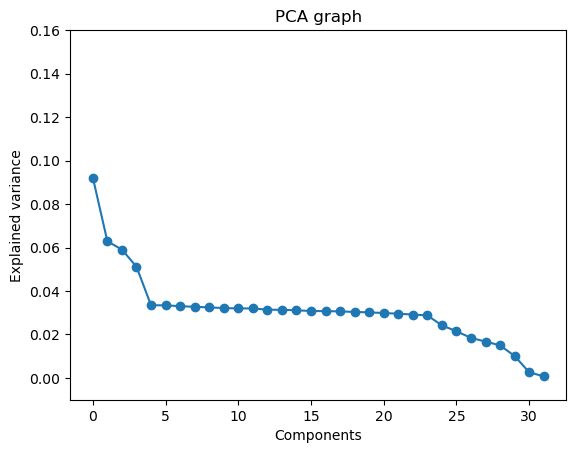

In [57]:
df_num_normalized=(df_num-df_num.mean())/df_num.std()
pca= PCA(n_components=df_num.shape[1])
pca.fit(df_num_normalized)
pca_names=['PC'+str(i) for i in range (1,len(df_num.columns)+1)]
df_num_pca=pd.DataFrame(pca.transform(df_num_normalized), columns = [*pca_names])

plt.plot(pca.explained_variance_ratio_,'o-')
plt.title('PCA graph')
plt.xlabel('Components')
plt.ylabel('Explained variance')
plt.ylim([-0.01,0.16])
#plt.xlim([-1,40])
plt.show()

## Eigenvalues

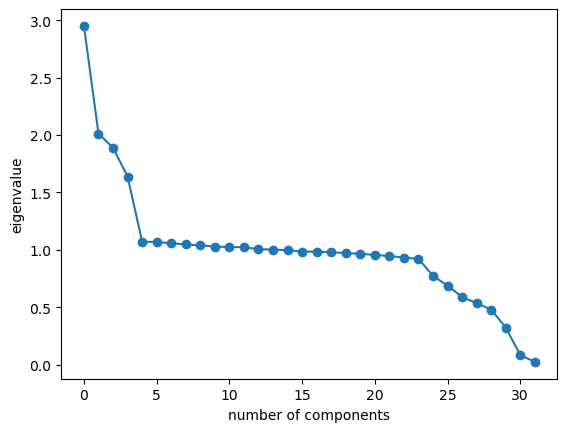

In [58]:
cov_matrix= np.dot(df_num_normalized.T,df_num_normalized)/df_num.shape[0]
eigenvalues =[np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

plt.plot(eigenvalues,'o-')
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.show()

## Loadings

In [59]:
loadings = pd.DataFrame(pca.components_.T,columns = [*pca_names],index=df_num.columns)
loadings.abs().sort_values(by=pca_names,ascending =False)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32
item1,0.458505,0.026753,0.017198,0.280550,0.001991,0.014039,0.007226,0.015016,0.015892,0.020194,0.016575,0.006616,0.020900,0.016699,0.006216,0.011481,0.014242,0.007156,0.004143,0.027958,0.007095,0.003893,0.008192,0.001959,0.070881,0.114422,0.044574,0.027460,0.241197,0.792064,0.010521,0.003398
item2,0.433593,0.031468,0.027957,0.282870,0.007564,0.009813,0.007864,0.005254,0.001053,0.001298,0.031544,0.016229,0.014675,0.004744,0.008585,0.007087,0.002870,0.011347,0.014813,0.011978,0.006034,0.015546,0.002214,0.002314,0.115849,0.165773,0.065738,0.068389,0.590659,0.573372,0.004580,0.001006
item6,0.404546,0.000265,0.015454,0.183045,0.038071,0.002235,0.018136,0.005064,0.038727,0.010540,0.006341,0.021864,0.012134,0.006226,0.007337,0.015013,0.019098,0.004967,0.002387,0.014831,0.005545,0.011351,0.006664,0.013506,0.069736,0.072206,0.757680,0.395753,0.228304,0.065485,0.000755,0.002235
item3,0.400260,0.023064,0.034053,0.279215,0.002996,0.028371,0.019136,0.016242,0.000195,0.010068,0.016704,0.018721,0.003681,0.016944,0.003040,0.006995,0.023001,0.036955,0.018770,0.007123,0.026634,0.009825,0.018268,0.001724,0.171771,0.254873,0.152230,0.389376,0.673875,0.175126,0.011515,0.001777
item7,0.358187,0.000838,0.000866,0.180743,0.028542,0.011735,0.005646,0.003911,0.047102,0.050118,0.008020,0.010527,0.047099,0.045984,0.012263,0.041790,0.006718,0.027099,0.004748,0.007601,0.024211,0.049603,0.031493,0.030075,0.151272,0.799342,0.384579,0.070297,0.068782,0.041035,0.001461,0.001978
item8,0.308509,0.005451,0.017029,0.130703,0.058205,0.069696,0.025802,0.010268,0.014900,0.005473,0.006318,0.013488,0.016144,0.035070,0.057275,0.031801,0.089816,0.082199,0.023965,0.030363,0.011180,0.039447,0.004557,0.044074,0.913488,0.030170,0.105487,0.044661,0.042852,0.042929,0.000800,0.003319
item5,0.175730,0.036731,0.055988,0.585020,0.008597,0.017056,0.001221,0.031137,0.001786,0.014281,0.004369,0.000874,0.012545,0.017301,0.007493,0.011547,0.009243,0.006846,0.005868,0.011264,0.035075,0.045376,0.004372,0.002759,0.140674,0.057422,0.201013,0.695661,0.259172,0.044085,0.001570,0.003783
item4,0.146048,0.025304,0.039768,0.566380,0.055001,0.003043,0.011020,0.005316,0.003239,0.012616,0.009033,0.003081,0.007396,0.010676,0.000163,0.012102,0.038817,0.006402,0.011663,0.016879,0.033349,0.038177,0.008542,0.005467,0.172590,0.479469,0.435472,0.436474,0.084186,0.018675,0.000877,0.000222
TechSupport,0.026435,0.020945,0.075192,0.000843,0.193831,0.308770,0.144367,0.373359,0.258275,0.177893,0.079520,0.247619,0.180357,0.119328,0.112184,0.074733,0.245601,0.065997,0.434377,0.101590,0.031963,0.208416,0.243959,0.296221,0.065676,0.000611,0.026405,0.003487,0.004568,0.012026,0.091990,0.008891
Bandwidth_GB_Year,0.016941,0.614484,0.339208,0.064765,0.002151,0.011425,0.002981,0.006224,0.001264,0.019931,0.003348,0.008135,0.010029,0.019196,0.006220,0.010452,0.001219,0.015047,0.009893,0.001659,0.020158,0.021000,0.013107,0.002210,0.010593,0.001028,0.004843,0.003583,0.000635,0.001529,0.071979,0.703495


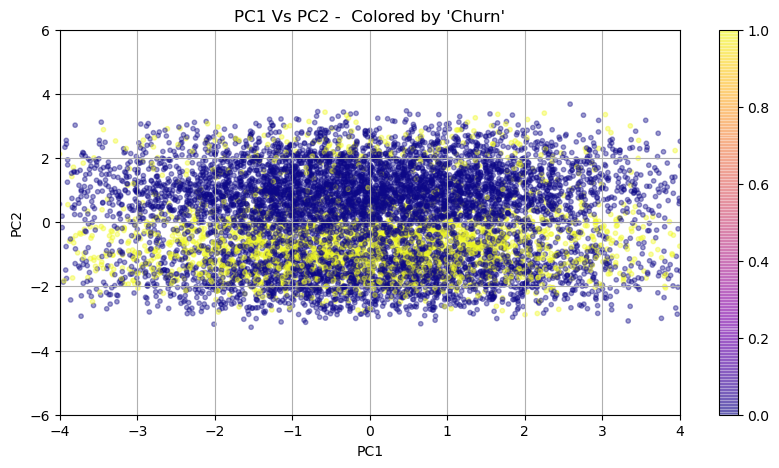

In [60]:
plt.figure(figsize=(10,5))
plt.scatter(df_num_pca.iloc[:,0],df_num_pca.iloc[:,1],s=10,alpha=0.4,c=df_ed.loc[:,'Churn'],cmap='plasma')
plt.colorbar();plt.grid('on')
plt.title("PC1 Vs PC2 -  Colored by 'Churn'" );plt.xlabel('PC1');plt.ylabel('PC2')
plt.ylim([-0.01,0.16]);plt.ylim([-6,6]);plt.xlim([-4,4])
plt.show()

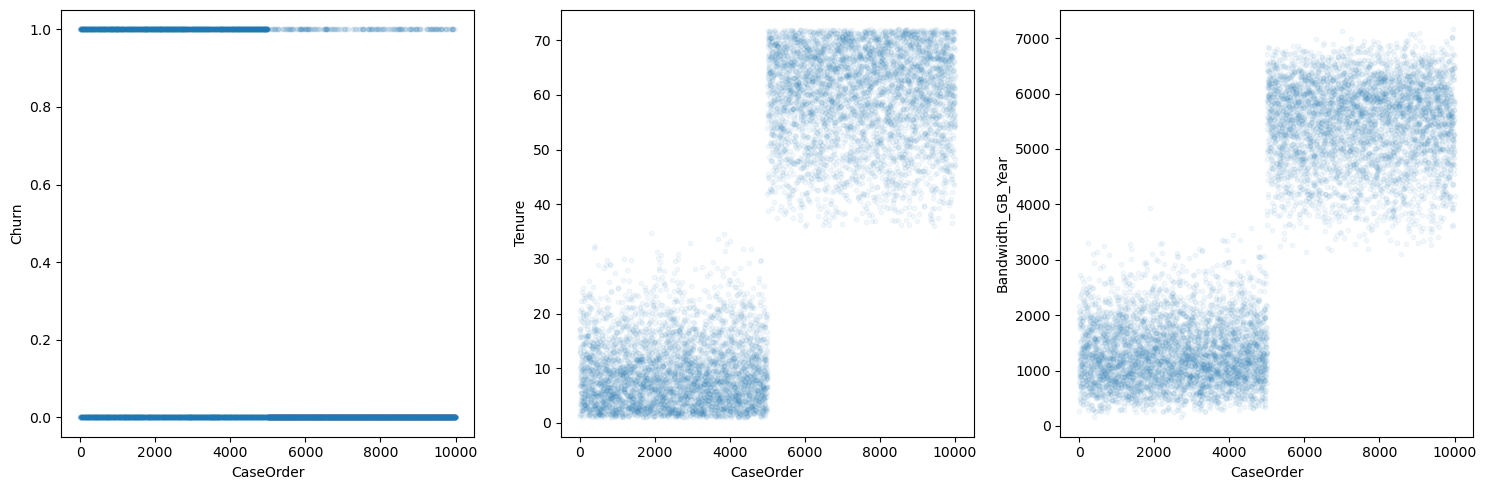

In [61]:
plt.figure(figsize=(15,5))
plt.subplot2grid(shape=(1,3),loc=(0,0))
plt.scatter(df_ed.iloc[:,0],df_ed.loc[:,'Churn'],s=10,alpha=0.05)
plt.xlabel('CaseOrder');plt.ylabel('Churn')

plt.subplot2grid(shape=(1,3),loc=(0,1))
plt.scatter(df_ed.iloc[:,0],df_ed.loc[:,'Tenure'],s=10,alpha=0.05)
plt.xlabel('CaseOrder');plt.ylabel('Tenure')

plt.subplot2grid(shape=(1,3),loc=(0,2))
plt.scatter(df_ed.iloc[:,0],df_ed.loc[:,'Bandwidth_GB_Year'],s=10,alpha=0.05)
plt.xlabel('CaseOrder');plt.ylabel('Bandwidth_GB_Year')

plt.tight_layout()
plt.show()

# Appendix: 

### Experimenting the effect of different options of Data Cleaning On the PCA and the estimation of ‘Churn’ possibility

#### Discussed Options:
* Using numeric fields only Vs including binary categorical fields
* Removing outliers.
* Removing irrelevant variables from the PCA , Indices ('Unnamed: 0', 'CaseOrder’)  and location ('Zip','Lng','Lat’)
* Removing the variables inhomogeneous variables 'Bandwidth_GB_Year' and 'Tenure'

#### Method:
* Applying PCA on pairs of options to check the effect on the possibility to estimate ‘Churn’ probability.
* Used PC1 vs PC2 scattered plots , colored points by the target variable "Churn" to estimate the efficiency and to compare between pairs of option.
* Identifying the main variables that contributed in each principal component, and investigating the logic behind that.

### 1st comparison

[![Slide3.png](https://i.postimg.cc/kGGCCthD/Slide3.png)](https://postimg.cc/0MTFdrvq)

[![Slide4.png](https://i.postimg.cc/TYyxHgD4/Slide4.png)](https://postimg.cc/ZChXW9j8)

[![Slide5.png](https://i.postimg.cc/MpVSzwt0/Slide5.png)](https://postimg.cc/rDVb9vBz)

From the Loadings of origional variables to the PCAs , we can see that main contributer in PC1 are the identical Indices column (CaseOrder and the unnamed index) !

then the Tenure and the Bandwidth_GB_Year columns , which are strongly related to the Index as discussed earlier in the section of "Missing values".

[![Slide6.png](https://i.postimg.cc/3wZQDZsd/Slide6.png)](https://postimg.cc/nsMPyqcJ)

[![Slide7.png](https://i.postimg.cc/3RJ5jvh9/Slide7.png)](https://postimg.cc/1gTjs4fN)

### 2nd comparison

[![Slide8.png](https://i.postimg.cc/5yrV2NZg/Slide8.png)](https://postimg.cc/9wySxVXw)

[![Slide9.png](https://i.postimg.cc/k5Cd4Hh0/Slide9.png)](https://postimg.cc/cvFzkFWh)

[![Slide10.png](https://i.postimg.cc/QxRDLCgx/Slide10.png)](https://postimg.cc/bsHWkzFK)

### 3rd comparison

[![Slide11.png](https://i.postimg.cc/mZpRw8t9/Slide11.png)](https://postimg.cc/8svqkddk)

[![Slide12.png](https://i.postimg.cc/ZnCG2zCd/Slide12.png)](https://postimg.cc/ZvzsvgPb)

[![Slide13.png](https://i.postimg.cc/4dLCWxNG/Slide13.png)](https://postimg.cc/k6bh49bY)

[![Slide14.png](https://i.postimg.cc/L5wcMQ10/Slide14.png)](https://postimg.cc/bS0CxTLQ)

[![Slide15.png](https://i.postimg.cc/Njh3JVYK/Slide15.png)](https://postimg.cc/PP4VNSCH)

### 4th comparison

[![Slide16.png](https://i.postimg.cc/RVnrT9rr/Slide16.png)](https://postimg.cc/jLKkspdv)

[![Slide17.png](https://i.postimg.cc/xjZDH84y/Slide17.png)](https://postimg.cc/vD5NwYMc)

[![Slide18.png](https://i.postimg.cc/BnxddgQM/Slide18.png)](https://postimg.cc/gx2Sh3hZ)

[![Slide19.png](https://i.postimg.cc/1zBbz3FF/Slide19.png)](https://postimg.cc/8FFZKDtk)

[![Slide20.png](https://i.postimg.cc/wBgSHm1H/Slide20.png)](https://postimg.cc/JsYT5t3d)

#### Conclusion:

1- Removing outliers didn’t make clear difference.

2- Using only the original numerical fields is better than converting categorical fields into num.

3- The first two columns [ unnamed index and CaseOrder ] have very high correlation with the subject of this study ,Although they are Identical and just indices.

4- Removing those 2 indices and the location columns ['Zip','Lng','Lat’], changes the PC severely,  putting the separation in the direction of PC2 rather than PC1 regardless the variance values.

5- The main variables that are responsible to classify ‘Churn’ tendency are 'Bandwidth_GB_Year' and 'Tenure’ variables.

6- We can easily notice that both of them are highly affected by the indices , the Row 5000 is separating both of them into two clearly distinguished clusters.

7- Removing 'Bandwidth_GB_Year' and 'Tenure’ variables from the PCA dramatically reduces the chance to classify the data and to use PCA.

8- CaseOrder (Index) , 'Bandwidth_GB_Year' and 'Tenure’  are the main variables that can be used to expect or estimate ‘Churn’ probability.

9- The Items variables (1 to 8) or the customer’s response to the eight questions survey come in the next place as Churn possibility identifiers.
